In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

sns.set_theme(font_scale=1.5);


Dipole field model:
$$|B| = \frac{M}{r^3}\sqrt{1 + 3 sin^2(\lambda)}$$

$$|B_{eq}| = \frac{2M}{r^3}$$

$M = 31,000$  nT-R$_E^3$

$$\frac{r}{L} = cos^2(\lambda)$$

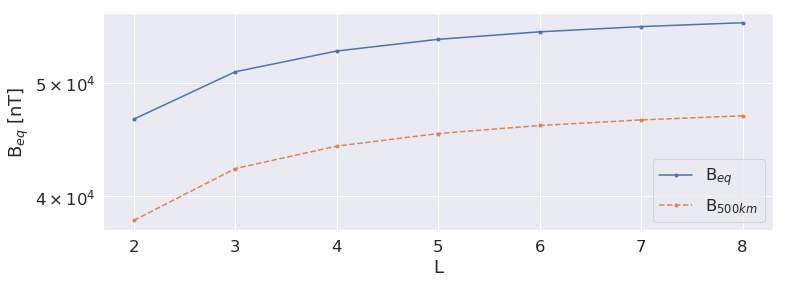

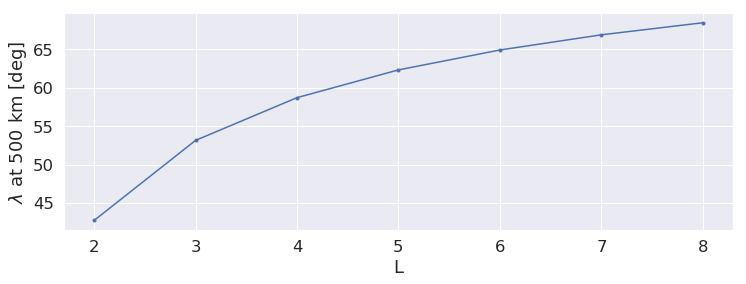

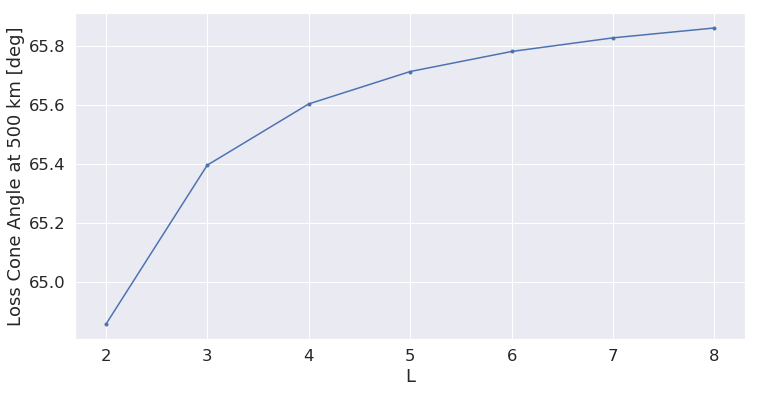

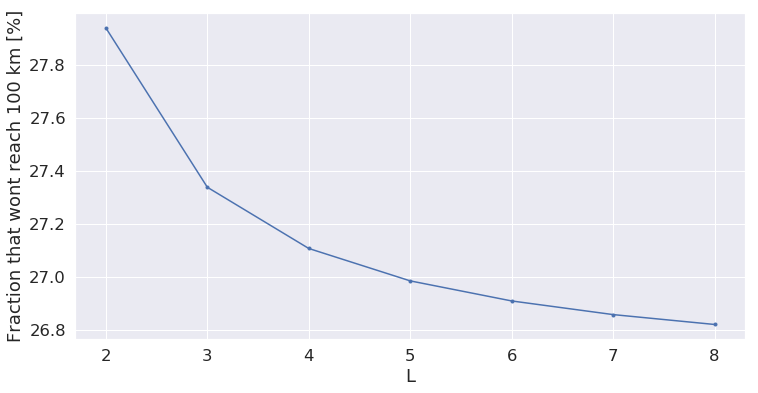

In [4]:
M = 31000;

L = np.array([2, 3, 4, 5, 6, 7, 8]);

# Latitude of each L-shell at 100 km and 500 km altitude
lambda_m   = np.arccos(np.sqrt( (6378+100)/(L * 6378) )); 
lambda_500 = np.arccos(np.sqrt( (6378+500)/(L * 6378) ))

# B-field intensity at 100 km
Bm = M / (1 + 100/6378)**3 * np.sqrt( 1 + 3*np.sin(lambda_m)**2 ); # nT 

# B-field strength at 500 km altitude over L-shells
B500 = M / (1 + 500/6378)**3 * np.sqrt(1 + 3 * np.sin(lambda_500)**2);

# Loss cone angle over L-shells
alphaLC = np.arcsin( np.sqrt( B500 / Bm ) ) 

plt.figure(figsize=(12,4)); plt.grid(True, which='both')
plt.plot(L, Bm, '.-', label='B$_{eq}$');
plt.plot(L, B500, '.--', label='B$_{500 km}$')
plt.xlabel('L');
plt.ylabel('B$_{eq}$ [nT]');
plt.legend();
plt.yscale('log')

plt.figure(figsize=(12,4)); plt.grid(True, which='both')
plt.plot(L, np.rad2deg(lambda_500), '.-');
plt.xlabel('L');
plt.ylabel('$\lambda$ at 500 km [deg]');

plt.figure(figsize=(12,6)); plt.grid(True, which='both')
plt.plot(L, np.rad2deg(alphaLC), '.-');
plt.xlabel('L');
plt.ylabel('Loss Cone Angle at 500 km [deg]');


plt.figure(figsize=(12,6)); plt.grid(True, which='both')
plt.plot(L, 100 * (np.pi/2 - alphaLC)/(np.pi/2), '.-');
plt.xlabel('L');
plt.ylabel('Fraction that wont reach 100 km [%]');

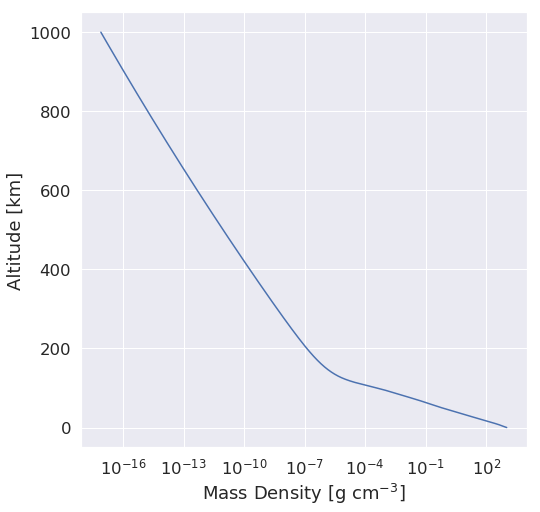

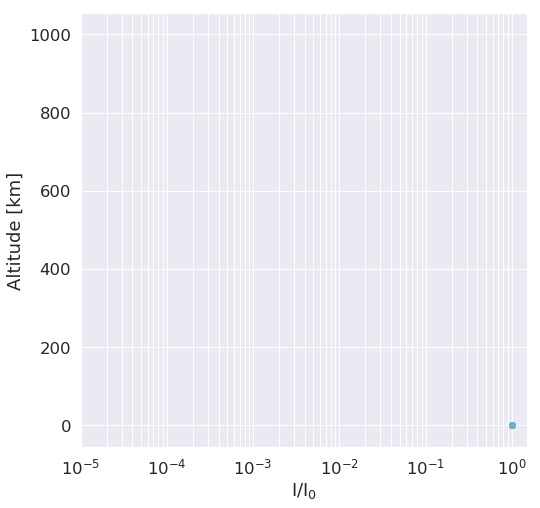

In [101]:
from scipy.integrate import cumtrapz

from scipy.io import loadmat

output = loadmat("msis_profile.mat")

mN2 = 4.65e-23;

z = np.linspace(0, 999, 1000);

plt.figure(figsize=(8,8));
plt.plot(mN2 * output['a'][:,1], z);
plt.xscale('log');
plt.xlabel('Mass Density [g cm$^{-3}$]');
plt.ylabel('Altitude [km]');


plt.figure(figsize=(8,8)); plt.grid(True, which='both')

for i in range(0, 1000):
    
    integral = np.exp(np.trapz(-1e-1 * mN2 * output['a'][:-i,1], x=z[:-i]))
    
    plt.scatter(integral, z[-i]);

    #integral = np.exp(-cumtrapz(-1e-1 * mN2 * output['a'][:1000-i,1], x=z[:1000-i]))
    #plt.plot(integral, z[1:1000-i]);
    
    

plt.xlabel('I/I$_0$');
plt.ylabel('Altitude [km]');
plt.xscale('log');
plt.xlim([1e-5, 1.5e0]);